In [1]:
pip install -q face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Matching face found at Top: 322, Left: 201, Bottom: 477, Right: 356
The single face is present in the group image.


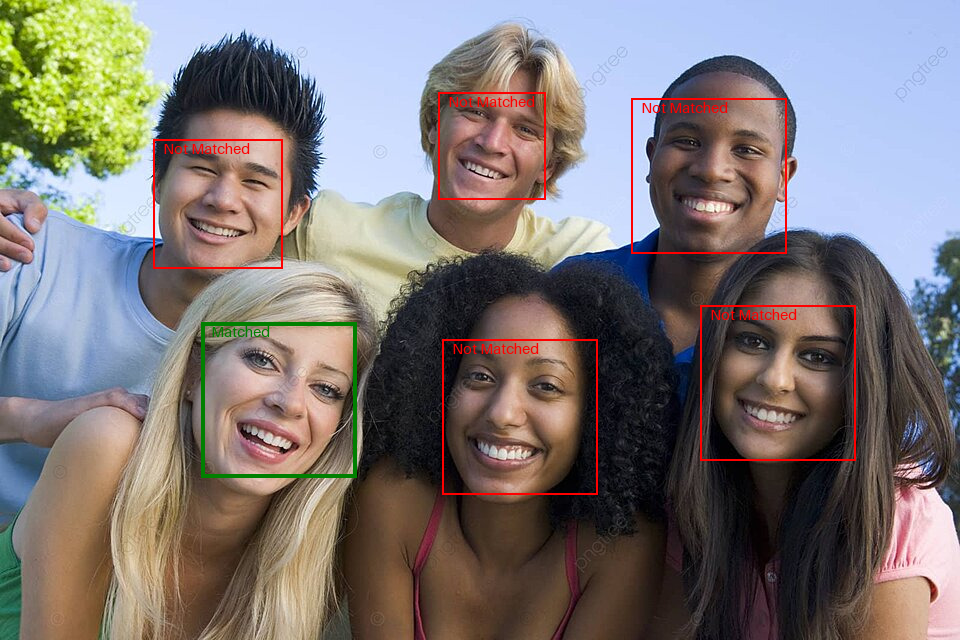

In [3]:
import face_recognition
import PIL.Image
import PIL.ImageDraw
import PIL.ImageFont
font = PIL.ImageFont.load_default(size=15)

# Load the single face image
single_face_image = face_recognition.load_image_file("/content/single.JPG")

# Load the group image
group_image = face_recognition.load_image_file("/content/group.jpg")

# Encode the face in the single face image
single_face_encoding = face_recognition.face_encodings(single_face_image)[0]

# Find all faces in the group image
group_face_locations = face_recognition.face_locations(group_image)
group_face_encodings = face_recognition.face_encodings(group_image, group_face_locations)

# Load the group image into a Python Image Library object so that we can draw on top of it
pil_image = PIL.Image.fromarray(group_image)

# Create a PIL drawing object to draw on the image
draw_handle = PIL.ImageDraw.Draw(pil_image)

single_face_found = False

for (face_location, face_encoding) in zip(group_face_locations, group_face_encodings):

    # Compare the face encoding to the single face encoding
    matches = face_recognition.compare_faces([single_face_encoding], face_encoding)

    # If there is a match, draw a box around the matching face
    if matches[0]:
        single_face_found = True
        top, right, bottom, left = face_location
        print(f"Matching face found at Top: {top}, Left: {left}, Bottom: {bottom}, Right: {right}")
        draw_handle.rectangle([left, top, right, bottom], outline="green", width=4)

        # Add text "Matched" above the rectangle
        text_position = (left+10, top)
        draw_handle.text(text_position, "Matched", fill="green", font=font)

    else:
        # Draw boxes around non-matching faces
        top, right, bottom, left = face_location
        draw_handle.rectangle([left, top, right, bottom], outline="red", width=2)
         # Add text "Not Matched" above the rectangle
        text_position = (left+10, top)
        draw_handle.text(text_position, "Not Matched", fill="red", font=font)

# Display the result
pil_image.show()

# Check if a single face was found
if single_face_found:
    print("The single face is present in the group image.")
else:
    print("The single face is not present in the group image.")
# for colab to display
pil_image